# 네이버 쇼핑 상품 목록 수집

## 1. 패키지 참조

In [9]:
# ChromeDriver 자동 설치 모듈
import chromedriver_autoinstaller
# Chrome을 제어하기 위한 객체
from selenium import webdriver
# Chrome이 웹 페이지 로딩을 완료 할 때까지 최대 n초간 대기하는 기능.
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
from pandas import DataFrame
# 파이썬 프로그램에 지정된 시간동안 랙을 거는 기능을 위해 사용
import time
# 한글을 URL에 포함시킬 수 있도록 인코딩 해주는 모듈
from urllib import parse

## 2. 크롬브라우저 가동하기

In [10]:
# 크롬드라이버 자동 설치
chromedriver_autoinstaller.install()

# 크롬드라이버를 통해 크롬을 실행시킴
# -> driver 객체는 Chrome 자체
driver = webdriver.Chrome()

# 크롬브라우저가 준비될 때 까지 최대 5초씩 대기
driver.implicitly_wait(5)

## 3. 수집할 URL 준비

In [11]:
# 검색어
keyword = "노트북"

# 검색어를 URL에 포함시킬 수 있는 형태로 인코딩 --> URLEncoding
encKeyword = parse.quote(keyword)

# 네이버 쇼핑 검색 URL
urlFmt = "https://search.shopping.naver.com/search/all?query={keyword}"
url = urlFmt.format(keyword=encKeyword)
url

'https://search.shopping.naver.com/search/all?query=%EB%85%B8%ED%8A%B8%EB%B6%81'

In [12]:
# 크롬브라우저로 방문시킴
driver.get(url)
time.sleep(1)

## 4. Javascript 가동을 위한 샘플 코드

In [16]:
# 웹 브라우저의 현재 스크롤바 높이를 가져옴
height = int(driver.execute_script("return document.body.scrollHeight"))
height

2706

In [18]:
# 화면의 맨 아래로 강제 스크롤 시키기
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

## 5. 이후 페이지 코드를 수집하는 내용 구현하기

'<html lang="ko"><head><meta name="viewport" content="width=device-width"><meta charset="utf-8"><title>노트북 : 네이버 쇼핑</title><link rel="shortcut icon" href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-230626-171519/img/favicon.ico"><meta property="og:title" content="노트북 : 네이버 쇼핑"><meta property="og:image" content="https://ssl.pstatic.net/imgshopping/static/mo2014/icon/og_shopping_v2.png"><meta property="og:description" content="\'노트북\'의 네이버쇼핑 검색 결과입니다"><meta name="next-head-count" content="7"><link rel="preconnect" href="https://static.nid.naver.com"><link rel="preconnect" href="https://lcs.naver.com"><link rel="preconnect" href="http://shopping.phinf.naver.net"><link rel="preconnect" href="https://ssl.pstatic.net"><link rel="preconnect" href="https://shopping-phinf.pstatic.net"><link rel="preconnect" href="https://volts.shopping.naver.com"><link rel="preload" href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-230626-171519/_next/static/css/6e08079a1bbdc07d.css" as="style"
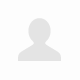
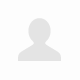

In [19]:
driver.page_source